### importing libraries

In [1]:
import os
import numpy as np
from PIL import Image
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import pad_sequences
import string

### image preprocessing

In [2]:
def preprocess_image(image_path, target_height=52, target_width=128):
    try:
        image = Image.open(image_path)
    except FileNotFoundError:
        print(f"Error: File '{image_path}' not found.")
        return None
    image = image.convert("L")
    image = image.resize((target_width, target_height),resample=Image.BICUBIC)
    image_array = np.array(image) / 255.0    
    return image_array

In [19]:
train_d=pd.read_csv("Train_data.csv")
list_of_images=train_d["ImageName"]

In [20]:
len(list_of_images)

100000

In [21]:
preprocessed_images = []
for image_path in list_of_images:
    preprocessed_image = preprocess_image(image_path)
    preprocessed_images.append(preprocessed_image)
preprocessed_images_array = np.array(preprocessed_images)
print("Shape of preprocessed images array:", preprocessed_images_array.shape)

Shape of preprocessed images array: (100000, 52, 128)


In [4]:
test_d=pd.read_csv("Test_data.csv")
list_of_images1=test_d["ImageName"]

In [5]:
list_of_images1=list_of_images1[:20000]

In [6]:
len(list_of_images1)

20000

In [7]:
preprocessed_images1 = []
for image_path in list_of_images1:
    preprocessed_image1 = preprocess_image(image_path)
    preprocessed_images1.append(preprocessed_image1)
preprocessed_images_array1 = np.array(preprocessed_images1)
print("Shape of preprocessed images array:", preprocessed_images_array1.shape)

Shape of preprocessed images array: (20000, 52, 128)


In [8]:
val_d=pd.read_csv("Validation_data.csv")
list_of_images_val=val_d["ImageName"]

In [9]:
list_of_images_val=list_of_images_val[-20000:]

In [10]:
len(list_of_images_val)

20000

In [11]:
preprocessed_images_val = []
for image_path in list_of_images_val:
    preprocessed_image_v = preprocess_image(image_path)
    preprocessed_images_val.append(preprocessed_image_v)
preprocessed_images_array_val = np.array(preprocessed_images_val)
print("Shape of preprocessed images array:", preprocessed_images_array_val.shape)

Shape of preprocessed images array: (20000, 52, 128)


### text preprocessing 

In [22]:
text_list=train_d["Labels"]

In [12]:
text_list1=test_d["Labels"]

In [13]:
text_list2=val_d["Labels"]

In [14]:
text_list1=text_list1[:20000]

In [15]:
text_list2=text_list2[-20000:]

In [20]:
len(text_list1)

20000

In [21]:
len(text_list2)

20000

In [23]:
normalized_word_list = text_list
i=0
def tokenize_word(word,ind):
    print(ind)
    print(word)
    return [str(char) for char in word]

tokenized_word_list = [tokenize_word(word,ind) for ind,word in enumerate(normalized_word_list)]
char_list = 'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789!\"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ ' # 95 chars
vocabulary = sorted(set(char_list))
char_to_index = {char: i for i, char in enumerate(vocabulary)}
index_to_char = {i: char for char, i in char_to_index.items()}


encoded_word_list = [[char_to_index[char] for char in word] for word in tokenized_word_list]

max_seq_length = 32
padded_word_list = pad_sequences(encoded_word_list, maxlen=max_seq_length, padding='post')

num_classes = len(vocabulary)
one_hot_encoded_list = [np.eye(num_classes)[word] for word in padded_word_list]

one_hot_encoded_array = np.array(one_hot_encoded_list)
one_hot_encoded_array = one_hot_encoded_array.reshape(-1, max_seq_length, num_classes)

print("Padded word list shape:", padded_word_list.shape)
print("One-hot encoded array shape:", one_hot_encoded_array.shape)


0
LUBE
1
SPENCERIAN
2
CARPENTER
3
SAVANNAS
4
UNFIX
5
CAGOULES
6
TRANSITS
7
LOOPED
8
COWMEN
9
SYSTEMICALLY
10
OFFSTAGES
11
ENQUIRERS
12
PLUCK
13
FURLONG
14
TOKED
15
BRAWL
16
LANCETS
17
AWARDED
18
VAXES
19
CRANIUMS
20
UNBROKEN
21
REIT
22
JARROD
23
UNFEIGNED
24
REGULATE
25
COLT
26
SNOOPING
27
MARQUISE
28
SHELF
29
UNTASTED
30
OVERUSING
31
ADAPTION
32
MENES
33
SILTIEST
34
KNURLING
35
SHOPFITTING
36
IDEAS
37
OUTWITTED
38
BIOL
39
PENMANSHIP
40
SUSTAINED
41
HISTORICALLY
42
BORGLUM
43
PLAZAS
44
CONTENTMENT
45
CALLAS
46
BANYAN
47
RANDOMIZED
48
POPULACE
49
DEPORT
50
DOCKED
51
GRASSROOTS
52
TURBANED
53
ATTIRED
54
LATCHES
55
QUENCHLESS
56
FRONTBENCHES
57
GRAFFITO
58
PANDERER
59
ENRICHED
60
CONQUERING
61
REINSPECTS
62
STICKIES
63
PRIVIEST
64
FEEDBAGS
65
DEMONETIZING
66
STAMINA
67
LIBRETTO
68
TURTLEDOVE
69
TONGUED
70
SEMITONES
71
DEPRECATION
72
MONOPOLIZES
73
TEMPTINGLY
74
FUTON
75
PROVERB
76
FLOSS
77
MAMACITAS
78
WISECRACKING
79
FLEECE
80
STUPORS
81
CENTAVOS
82
HAUNCH
83
REALEST
84
REFORESTS
85
FAIN

In [24]:
normalized_word_list1 = text_list1

# Tokenize words into characters
def tokenize_word(word):
    return [str(char) for char in word]

tokenized_word_list1 = [tokenize_word(word) for word in normalized_word_list1]
encoded_word_list1 = [[char_to_index[char] for char in word] for word in tokenized_word_list1]

max_seq_length1 = 32
padded_word_list1 = pad_sequences(encoded_word_list1, maxlen=max_seq_length1, padding='post')

num_classes1 = len(vocabulary)
one_hot_encoded_list1 = [np.eye(num_classes1)[word] for word in padded_word_list1]

one_hot_encoded_array1 = np.array(one_hot_encoded_list1)
one_hot_encoded_array1 = one_hot_encoded_array1.reshape(-1, max_seq_length1, num_classes1)

print("Padded word list shape for the second word list:", padded_word_list1.shape)
print("One-hot encoded array shape for the second word list:", one_hot_encoded_array1.shape)


Padded word list shape for the second word list: (20000, 32)
One-hot encoded array shape for the second word list: (20000, 32, 95)


In [25]:
normalized_word_list2 = text_list2

# Tokenize words into characters
def tokenize_word(word):
    return [str(char) for char in word]

tokenized_word_list2 = [tokenize_word(word) for word in normalized_word_list2]
encoded_word_list2 = [[char_to_index[char] for char in word] for word in tokenized_word_list2]

max_seq_length2 = 32
padded_word_list2 = pad_sequences(encoded_word_list2, maxlen=max_seq_length2, padding='post')

num_classes2 = len(vocabulary)
one_hot_encoded_list2 = [np.eye(num_classes2)[word] for word in padded_word_list2]

one_hot_encoded_array2 = np.array(one_hot_encoded_list2)
one_hot_encoded_array2 = one_hot_encoded_array2.reshape(-1, max_seq_length2, num_classes2)

print("Padded word list shape for the second word list:", padded_word_list2.shape)
print("One-hot encoded array shape for the second word list:", one_hot_encoded_array2.shape)


Padded word list shape for the second word list: (20000, 32)
One-hot encoded array shape for the second word list: (20000, 32, 95)


## model architecture

In [25]:
model = models.Sequential()
model.add(layers.Conv2D(104, (3, 3), activation='relu', padding='same', input_shape=(52, 128, 1), kernel_initializer='he_normal'))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
model.add(layers.BatchNormalization())

model.add(layers.SeparableConv2D(208, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
model.add(layers.BatchNormalization())

model.add(layers.SeparableConv2D(416, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(layers.MaxPooling2D((4, 1)))
model.add(layers.BatchNormalization())

model.add(layers.SeparableConv2D(416, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(layers.MaxPooling2D((2, 1)))
model.add(layers.BatchNormalization()) 

model.add(layers.Lambda(lambda x: tf.squeeze(x, axis=1)))

model.add(layers.Bidirectional(layers.GRU(128, return_sequences=True, kernel_initializer='he_normal'), merge_mode='sum'))
model.add(layers.Bidirectional(layers.GRU(128, return_sequences=True, kernel_initializer='he_normal'), merge_mode='sum'))
model.add(layers.TimeDistributed(layers.Dense(95, activation='softmax')))
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 52, 128, 104)      1040      
                                                                 
 max_pooling2d (MaxPooling2  (None, 26, 64, 104)       0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 26, 64, 104)       416       
 Normalization)                                                  
                                                                 
 separable_conv2d (Separabl  (None, 26, 64, 208)       22776     
 eConv2D)                                                        
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 32, 208)       0         
 g2D)                                                 

In [26]:
model.outputs

[<KerasTensor: shape=(None, 32, 95) dtype=float32 (created by layer 'time_distributed')>]

In [29]:
model1=model

In [30]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

In [31]:
model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history1 = model1.fit(preprocessed_images_array, one_hot_encoded_array,
                    epochs=20,
                    batch_size=32,validation_data=(preprocessed_images_array_val,one_hot_encoded_array2), callbacks=[early_stopping])


Epoch 1/20
3125/3125 [==============================] - 977s 309ms/step - loss: 0.5193 - accuracy: 0.8407 - val_loss: 0.3881 - val_accuracy: 0.8744
Epoch 2/20
3125/3125 [==============================] - 965s 309ms/step - loss: 0.3013 - accuracy: 0.9041 - val_loss: 0.2558 - val_accuracy: 0.9204
Epoch 3/20
3125/3125 [==============================] - 1455s 466ms/step - loss: 0.2167 - accuracy: 0.9335 - val_loss: 0.2023 - val_accuracy: 0.9390
Epoch 4/20
3125/3125 [==============================] - 1154s 369ms/step - loss: 0.1728 - accuracy: 0.9484 - val_loss: 0.1853 - val_accuracy: 0.9443
Epoch 5/20
3125/3125 [==============================] - 977s 313ms/step - loss: 0.1474 - accuracy: 0.9566 - val_loss: 0.1588 - val_accuracy: 0.9539
Epoch 6/20
3125/3125 [==============================] - 934s 299ms/step - loss: 0.1305 - accuracy: 0.9620 - val_loss: 0.1508 - val_accuracy: 0.9570
Epoch 7/20
3125/3125 [==============================] - 938s 300ms/step - loss: 0.1182 - accuracy: 0.9657 - va

In [35]:
import pickle
file_path = "sj_final.pkl"
with open(file_path, 'wb') as f:
    pickle.dump(model1, f)

In [33]:
pwd

'C:\\mini_final_testing'

In [36]:
acc,loss=model1.evaluate(preprocessed_images_array_val,one_hot_encoded_array2)

625/625 [==============================] - 52s 83ms/step - loss: 0.1292 - accuracy: 0.9663


In [39]:
acc1=loss

In [40]:
loss1=acc

In [41]:
acc1

0.9663031101226807

In [27]:
model1=loaded_model

## predictions

In [28]:
y_pred=model1.predict(preprocessed_images_array_val)

625/625 [==============================] - 59s 87ms/step


In [29]:
test_pred=model1.predict(preprocessed_images_array1)

625/625 [==============================] - 59s 94ms/step


In [44]:
test_pred.shape

(20000, 32, 95)

In [45]:
y_pred.shape

(20000, 32, 95)

In [46]:
y_pred

array([[[1.19307524e-08, 4.00662923e-12, 3.69984859e-12, ...,
         1.81395231e-12, 4.73987516e-12, 5.29989030e-12],
        [6.03257888e-07, 6.92329744e-12, 1.24285235e-11, ...,
         8.87210704e-12, 6.38675614e-12, 1.08863725e-11],
        [1.17906552e-07, 1.09354813e-13, 7.12747027e-13, ...,
         3.12215884e-13, 1.43426503e-13, 1.94702978e-13],
        ...,
        [1.00000000e+00, 7.40818774e-16, 8.58643585e-17, ...,
         9.74883902e-17, 2.63950660e-16, 5.91207133e-16],
        [1.00000000e+00, 4.17320470e-15, 6.06394275e-16, ...,
         7.46837049e-16, 1.60852711e-15, 3.50338926e-15],
        [1.00000000e+00, 2.41868276e-14, 4.61002256e-15, ...,
         6.14387979e-15, 1.42276836e-14, 2.81496255e-14]],

       [[1.00849880e-08, 8.27512267e-13, 6.93417220e-13, ...,
         6.60716273e-13, 8.49365662e-13, 1.71300918e-12],
        [4.47866626e-07, 1.56061102e-11, 1.72718177e-11, ...,
         1.35772478e-11, 6.27246345e-12, 1.89085501e-11],
        [2.40888113e-07, 

### accuracies

In [30]:
predicted_labels_flat = np.argmax(y_pred, axis=-1)
y_test_flat = np.argmax(one_hot_encoded_array2, axis=-1)

In [31]:
correct_predictions = np.sum(np.equal(predicted_labels_flat, y_test_flat))
total_predictions = np.prod(predicted_labels_flat.shape)
accuracy = correct_predictions / total_predictions * 100

print(f"Accuracy: {accuracy:.2f}%")


Accuracy: 96.63%


In [32]:
predicted_labels_flat1 = np.argmax(test_pred, axis=-1)
y_test_flat1 = np.argmax(one_hot_encoded_array1, axis=-1)

In [39]:
correct_predictions = np.sum(np.equal(predicted_labels_flat1, y_test_flat1))
total_predictions = np.prod(predicted_labels_flat1.shape)
accuracy = correct_predictions / total_predictions * 100
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 96.68%


In [40]:
from sklearn.metrics import precision_score, recall_score, f1_score,jaccard_score

# Flatten the y_test and predicted_labels arrays
y_test_flat12 = y_test_flat1.reshape(-1)
predicted_labels_flat12 = predicted_labels_flat1.reshape(-1)

# Compute precision, recall, and F1-score
precision = precision_score(y_test_flat12, predicted_labels_flat12, average='weighted')
recall = recall_score(y_test_flat12, predicted_labels_flat12, average='weighted')
f1 = f1_score(y_test_flat12, predicted_labels_flat12, average='weighted')
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


C:\Users\guhan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 0.97
Recall: 0.97
F1 Score: 0.97


In [42]:
jaccard_values = []
for i in range(len(y_test_flat1)):
    jaccard_coefficient = jaccard_score(y_test_flat1[i], predicted_labels_flat1[i], average='macro')
    jaccard_values.append(jaccard_coefficient)

In [43]:
jac_mean=np.mean(jaccard_values)

In [44]:
print(f"Jaccard coefficient: {jac_mean:.2f}")

Jaccard coefficient: 0.86


In [52]:
intersection = 0
union = 0

# Loop through each sample
for i in range(len(predicted_labels_flat)):
    # Get predicted and ground truth labels for the current sample
    predicted_labels = set(np.where(predicted_labels_flat[i])[0])
    ground_truth_labels = set(np.where(y_test_flat[i])[0])
    
    # Calculate intersection and union
    intersection += len(predicted_labels.intersection(ground_truth_labels))
    union += len(predicted_labels) + len(ground_truth_labels)

# Calculate Dice coefficient
dice_coefficient = (2.0 * intersection) / union

print(f" validation Dice coefficient: {dice_coefficient:.2f}")


 validation Dice coefficient: 0.99


In [53]:
intersection = 0
union = 0

# Loop through each sample
for i in range(len(predicted_labels_flat1)):
    # Get predicted and ground truth labels for the current sample
    predicted_labels = set(np.where(predicted_labels_flat1[i])[0])
    ground_truth_labels = set(np.where(y_test_flat1[i])[0])
    
    # Calculate intersection and union
    intersection += len(predicted_labels.intersection(ground_truth_labels))
    union += len(predicted_labels) + len(ground_truth_labels)

# Calculate Dice coefficient
dice_coefficient = (2.0 * intersection) / union

print(f"testing Dice coefficient: {dice_coefficient:.2f}")

testing Dice coefficient: 0.99


In [54]:
y_pred.shape

(20000, 32, 95)

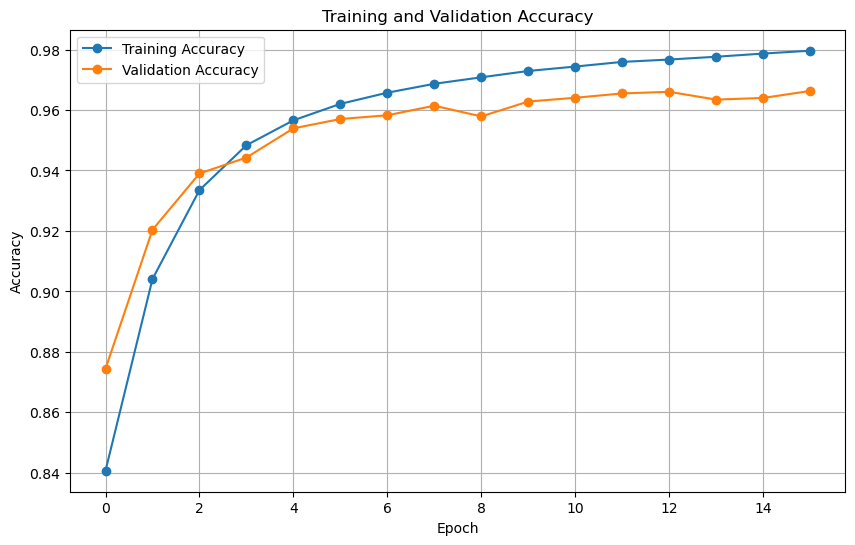

In [55]:
plt.figure(figsize=(10, 6))
plt.plot(history1.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

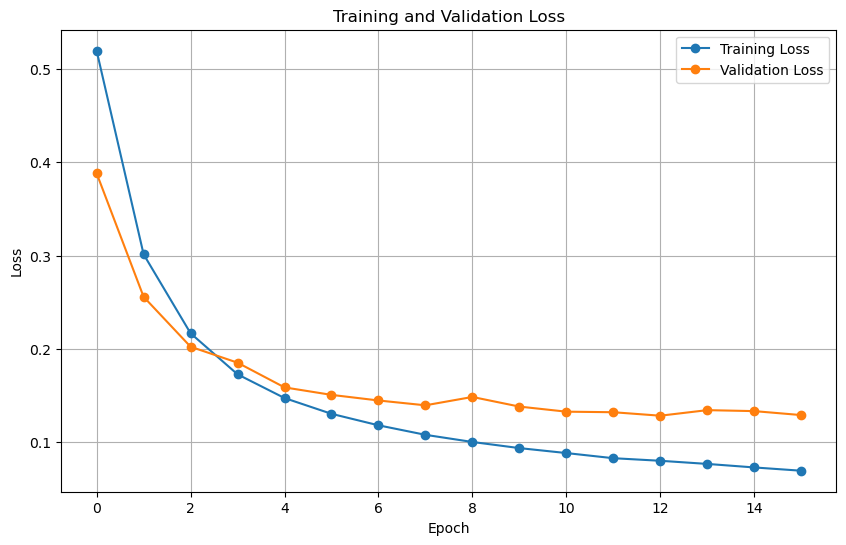

In [56]:
plt.figure(figsize=(10, 6))
plt.plot(history1.history['loss'], label='Training Loss', marker='o')
plt.plot(history1.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

### ctc decoder for text predictions from the probabilities

In [15]:
char_list = 'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789!\"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ ' # 95 chars
vocabulary = sorted(set(char_list))

In [16]:
len(vocabulary)

95

In [17]:
char_to_index = {char: i for i, char in enumerate(vocabulary)}
index_to_char = {i: char for char, i in char_to_index.items()}

In [13]:
def unpad_sequence(seq):
    return [index for index in seq if index != 0]

In [61]:
def ctc_decoder(actual,pred):
    pred_list = np.argmax(pred, axis=-1)
    actual_list = np.argmax(actual, axis=-1)
    decoded_pred_list = [[index_to_char[index] for index in unpad_sequence(seq)] for seq in pred_list]
    decoded_pred_list = [''.join(word) for word in decoded_pred_list]
    decoded_actual_list = [[index_to_char[index] for index in unpad_sequence(seq)] for seq in actual_list]
    decoded_actual_list = [''.join(word) for word in decoded_actual_list]
    return decoded_actual_list,decoded_pred_list

In [62]:
act,pred=ctc_decoder(one_hot_encoded_array1,test_pred)

In [63]:
act

['SLINKING',
 'REMODELERS',
 'CHRONOGRAPHS',
 'IMPEACHING',
 'LOOTS',
 'UNDERPAYS',
 'FLAMEPROOFED',
 'ENTICEMENTS',
 'UKASE',
 'DESCANTED',
 'COOLIDGE',
 'DOZINESS',
 'SUPREMACY',
 'REMODELERS',
 'RESOLED',
 'PERCIPIENCE',
 'TERRIFYINGLY',
 'PRIZEWINNER',
 'ELABORATELY',
 'HOPSCOTCHED',
 'TELNETTED',
 'WARMING',
 'BOOKSTORES',
 'METER',
 'SAVAGENESS',
 'POPPADOMS',
 'GUISES',
 'RECEPTACLE',
 'GLADIOLI',
 'GUNSHIPS',
 'COXES',
 'DOZY',
 'EMPOWERED',
 'PUZZLERS',
 'DESIGNATING',
 'GOLDMINE',
 'WRIST',
 'PREPPED',
 'PUNCHY',
 'BELCHING',
 'TUBER',
 'LAVATORIAL',
 'HOSTESSES',
 'BATHTUB',
 'HALFWAY',
 'REARM',
 'BLATHER',
 'SCHOOLBOY',
 'TOWNES',
 'ANNOTATING',
 'HISTORIES',
 'GLOSSIES',
 'RATIONALIZES',
 'REMASTER',
 'YOURSELF',
 'WAFFLED',
 'DARTH',
 'CRESTLESS',
 'FINN',
 'ANALOGIES',
 'FATSOS',
 'PENISES',
 'DOMESTICATES',
 'BREWS',
 'RUTHENIUM',
 'SURER',
 'OFFENSES',
 'SIRRAH',
 'STOMPING',
 'SPARSITY',
 'SACRUM',
 'DIMMED',
 'PUFFER',
 'REFLEXES',
 'DISSEMBLES',
 'TRANCHES',
 'OOHI

In [64]:
pred

['SLINKNNG',
 'REMODELERS',
 'CHIGRGPROPHS',
 'IMPECCHING',
 'LOOTS',
 'UNDERPAYS',
 'PLAPFFSIIE',
 'ENTICEMENNS',
 'UKASE',
 'DESCAMTED',
 'COOLIDGE',
 'DOZZIESS',
 'SUPREMACY',
 'REMODELERS',
 'RESOLED',
 'PERCIPINNC',
 'TERNTGYNGLYY',
 'PRIZEWINNER',
 'ELABORAICLY',
 'HOPSCOTCHED',
 'TEINETTED',
 'WARMING',
 'BOOKSTORES',
 'LISTER',
 'SAVAGENESS',
 'PEPPAUOOR',
 'GUISES',
 'REREPTTCCE',
 'SUANOLL',
 'CUNSHIPS',
 'COXES',
 'DOZY',
 'EMPOWERED',
 'PUZZLERS',
 'DESIGNATING',
 'GOLDMINE',
 'WRIST',
 'PREPPED',
 'PUNCHY',
 'BELCHING',
 'TUBER',
 'LAVATORIAL',
 'GOSTESSES',
 'SRAAS',
 'HALFWAY',
 'REARM',
 'BLATHER',
 'SCHOOLBOY',
 'TOUNES',
 'ANNORATING',
 'HISTORIIS',
 'GLOSSIES',
 'RATTONALIZES',
 'REMASTER',
 'YOURSELE',
 'WAFFLED',
 'DARTH',
 'CREDILSS',
 'FINN',
 'ANALOGIES',
 'EAISOS',
 'PENISES',
 'DOMESTICATE',
 'PLASS',
 'TUTHENIUM',
 'SURER',
 'OFFENSES',
 'SIREFLE',
 'STOMPING',
 'SPARCITY',
 'SACRUM',
 'OMMMED',
 'FANNEE',
 'VIFFRCRS',
 'DISSEMBLES',
 'TRANCHES',
 'OONING',
 

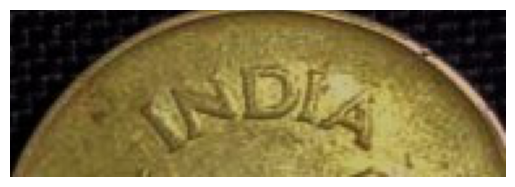

In [63]:
import cv2
image_path = "502_INDIA_26357_1.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis('off')
plt.show()

In [64]:
processed_image=preprocess_image(image_path)

In [65]:
processed_image.shape

(52, 128)

In [66]:
image=processed_image

In [67]:
image = np.expand_dims(image, axis=0)  # Add a batch dimension
image = np.expand_dims(image, axis=-1)  # Add a channel dimension

In [3]:
import pickle

# Load the model
with open('sj_final.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

In [68]:
predd=loaded_model.predict(image)

1/1 [==============================] - 0s 60ms/step


In [69]:
predd.shape

(1, 32, 95)

In [70]:
pred_list = np.argmax(predd, axis=-1)
decoded_pred_list = [[index_to_char[index] for index in unpad_sequence(seq)] for seq in pred_list]
decoded_pred_list = [''.join(word) for word in decoded_pred_list]

In [71]:
print(decoded_pred_list)

['TRDSS']


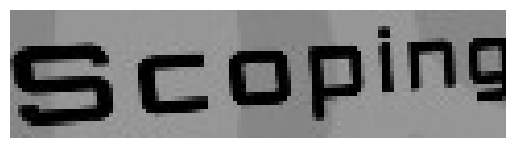

In [53]:
image_path = "57_Scoping_68464.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis('off')
plt.show()

In [55]:
processed_image=preprocess_image(image_path)

In [56]:
processed_image.shape

(52, 128)

In [57]:
image=processed_image

In [58]:
image = np.expand_dims(image, axis=0)  # Add a batch dimension
image = np.expand_dims(image, axis=-1)

In [59]:
predd=loaded_model.predict(image)

1/1 [==============================] - 0s 40ms/step


In [60]:
predd.shape

(1, 32, 95)

In [61]:
pred_list = np.argmax(predd, axis=-1)
decoded_pred_list = [[index_to_char[index] for index in unpad_sequence(seq)] for seq in pred_list]
decoded_pred_list = [''.join(word) for word in decoded_pred_list]

In [62]:
print(decoded_pred_list)

['SCOPING']


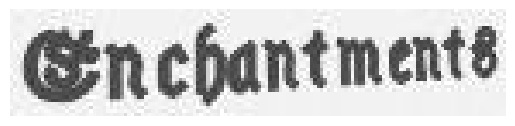

In [72]:
image_path = "58_Enchantments_25563.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis('off')
plt.show()

In [73]:
processed_image=preprocess_image(image_path)

In [74]:
processed_image.shape

(52, 128)

In [75]:
image=processed_image

In [76]:
image = np.expand_dims(image, axis=0) 
image = np.expand_dims(image, axis=-1)

In [77]:
predd=loaded_model.predict(image)

1/1 [==============================] - 0s 43ms/step


In [78]:
predd.shape

(1, 32, 95)

In [79]:
pred_list = np.argmax(predd, axis=-1)
decoded_pred_list = [[index_to_char[index] for index in unpad_sequence(seq)] for seq in pred_list]
decoded_pred_list = [''.join(word) for word in decoded_pred_list]

In [80]:
print(decoded_pred_list)

['ENCHANTEENNS']


In [3]:
list_of_images=os.listdir("C:\\mini_final_testing\\cropped_images_total")

In [8]:
preprocessed_images = []
for image_path in list_of_images:
    image_path=os.path.join("C:\\mini_final_testing\\cropped_images_total",image_path)
    preprocessed_image = preprocess_image(image_path)
    preprocessed_images.append(preprocessed_image)
preprocessed_images_array = np.array(preprocessed_images)
print("Shape of preprocessed images array:", preprocessed_images_array.shape)

Shape of preprocessed images array: (1943, 52, 128)


In [11]:
predd=loaded_model.predict(preprocessed_images_array)

61/61 [==============================] - 14s 150ms/step


In [18]:
pred_list = np.argmax(predd, axis=-1)
decoded_pred_list = [[index_to_char[index] for index in unpad_sequence(seq)] for seq in pred_list]
decoded_pred_list = [''.join(word) for word in decoded_pred_list]

In [34]:
len(decoded_pred_list)

1943

In [20]:
decoded_pred_list

['EARUNK',
 'SWGG',
 'POEEE',
 'COFFEE',
 'HOKZ',
 'GEMMBRA',
 'INDIA',
 'TANS',
 'MAHAT',
 'MELBBORNE',
 'AUSTRALIA',
 'RALLWAY',
 'SNSAE',
 'SAVS',
 'STAASS',
 'HOUSLSSIOUUS',
 'YOGURT',
 'COLOURFUL',
 'SERPRROUUER',
 'SRDSS',
 'SITYYY',
 'RAPT',
 'SHOON',
 'SLASS',
 'THOOSSTEE',
 'TASS',
 'OEAASSEEEE',
 'TIAD',
 'GLOVE',
 'DISNOSIBLL',
 'MACAU',
 'DARL',
 'SHROOEEE',
 'SSHHLIAHED',
 'BIOMETTIC',
 'TORS',
 'MEASURING',
 'HUMAN',
 'BIOMETRICS',
 'INTRODUCTION',
 'SAAS',
 'GAISSE',
 'SYSTEMS',
 'PHYYLOLGICAYY',
 'DEHAVIORAL',
 'BBIOMETRICC',
 'PERSONA',
 'RECOGNNTION',
 'STANDS',
 'BIOMETIUS',
 'PERSON',
 'FORT',
 'MEWORK',
 'ORIS',
 'UNWERSSI',
 'TASS',
 'SW99',
 'LORA',
 'COMPRESSION',
 'PASS',
 'SAAS',
 'LOSSY',
 'TECHNIQUE',
 'COST',
 'TARL',
 'QUANTIZATION',
 'DISCRETE',
 'ABSTRACT',
 'MARD',
 'RIDA',
 'ETTRD',
 'SOGG',
 'SWAD',
 'COES',
 'DOUBL',
 'PAADEE',
 'TRES',
 'PEAK',
 'KOOKOUT',
 'SW9S',
 'TEOOS',
 'CE9S',
 'COAGA',
 'SODDE',
 'NOWDUUGG',
 'SLAGSG',
 'SOSGE',
 'SLESS',
 '

In [23]:
img1=preprocessed_images_array[3]

In [26]:
img1.shape

(52, 128)

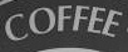

In [27]:
img = Image.fromarray(np.uint8(img1 * 255) , 'L')
img

In [28]:
img1=preprocessed_images_array[6]

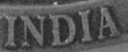

In [29]:
img = Image.fromarray(np.uint8(img1 * 255) , 'L')
img

In [30]:
img1=preprocessed_images_array[9]

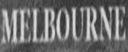

In [31]:
img = Image.fromarray(np.uint8(img1 * 255) , 'L')
img

In [32]:
img1=preprocessed_images_array[10]

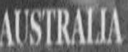

In [33]:
img = Image.fromarray(np.uint8(img1 * 255) , 'L')
img